In [1]:
!pip install pywaffle missingno


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pywaffle import Waffle
import matplotlib.pyplot as plt

import random
import math
import datetime
from datetime import date,datetime
from datetime import timedelta
import re
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import missingno as msno
from pywaffle import Waffle

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading the Dataset
xls = pd.ExcelFile('Cardiac_Outcomes.xlsx')
#Reading the Hospitalization_Discharge sheet
df_HD = pd.read_excel(xls, 'Hospitalization_Discharge')
#Reading the CardiacComplications sheet
df_CC = pd.read_excel(xls, 'CardiacComplications')
#Reading the Responsivenes sheet
df_R= pd.read_excel(xls, 'Responsivenes')
#Reading the PatientHistory sheet
df_PH = pd.read_excel(xls, 'PatientHistory')
#Reading the Labs sheet
df_L = pd.read_excel(xls, 'Labs')
#Reading the Demography sheet
df_D = pd.read_excel(xls, 'Demography')
#Reading the Patient_Precriptions sheet
df_PP = pd.read_excel(xls, 'Patient_Precriptions')

# Q1 How many patients were registered in each unique occupation?

In [4]:
df_D.groupby(["occupation"])["inpatient_number"].count()

occupation
Officer             7
Others             89
UrbanResident    1670
farmer            198
worker             17
Name: inpatient_number, dtype: int64

# Q2 Divide GCS scores into slabs of 5 and count the number of patients under each band of score. Show this as any graph of your choice

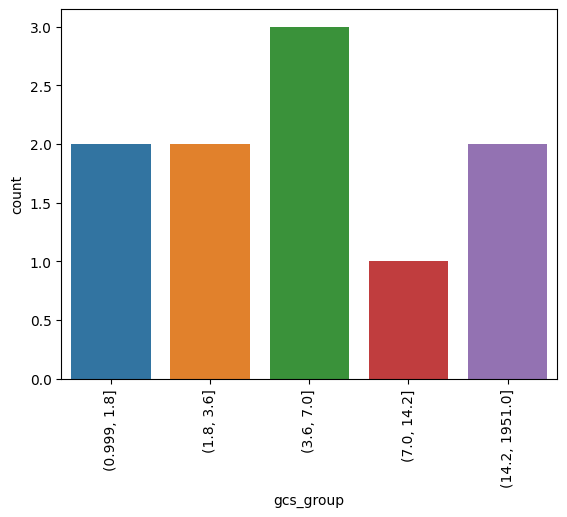

In [5]:
df_gcs = df_R.groupby(['GCS'])['inpatient_number'].count().reset_index()

df_gcs_slab = pd.DataFrame({'gcs_group': pd.qcut(df_gcs['inpatient_number'], 5)})

ax = sns.countplot(data=df_gcs_slab, x='gcs_group')
ax.tick_params(axis='x', labelrotation=90)

# Q3 Add a calculated column called Discharge date into the Hospitalization_Discharge using the information already available to you

In [6]:
df_HD["Discharge_date"] = df_HD["Admission_date"] + pd.to_timedelta(df_HD["dischargeDay"], unit='d')

df_HD.head()

,inpatient_number,DestinationDischarge,admission_ward,admission_way,discharge_department,visit_times,respiratory_support,oxygen_inhalation,dischargeDay,Admission_date,...,re_admission_within_28_days,death_within_3_months,re_admission_within_3_months,death_within_6_months,re_admission_within_6_months,time_of_death__days_from_admission,readmission_time_days_from_admission,return_to_emergency_department_within_6_months,time_to_emergency_department_within_6_months,Discharge_date
0,857781,Home,Cardiology,NonEmergency,Cardiology,1,NaN,OxygenTherapy,11,2017-01-24,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2017-02-04
1,743087,Home,Cardiology,NonEmergency,Cardiology,1,NaN,OxygenTherapy,8,2017-05-05,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2017-05-13
2,866418,Home,Cardiology,NonEmergency,Cardiology,2,NaN,OxygenTherapy,5,2016-11-18,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2016-11-23
3,775928,Home,Cardiology,Emergency,Cardiology,1,NaN,OxygenTherapy,11,2017-10-02,...,1,0,1,0,1,NaN,19.0,1.0,19.0,2017-10-13
4,810128,Home,Cardiology,NonEmergency,Cardiology,1,NaN,OxygenTherapy,5,2019-11-17,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2019-11-22


# Q4 What percentage of patients had Biventricular heart failure?

In [7]:
df_biventricular = df_CC.loc[df_CC['type_of_heart_failure'] == 'Both']

(df_biventricular['inpatient_number'].count() / df_CC['inpatient_number'].count()) * 100

73.70517928286853

# Q5 What is the ratio of patients who were responsive to pain vs responsive to sound?

In [8]:
df_resp_to_pain = df_R.loc[df_R['consciousness'] == 'ResponsiveToPain']
df_resp_to_sound = df_R.loc[df_R['consciousness'] == 'ResponsiveToSound']

df_resp_to_pain['inpatient_number'].count() / df_resp_to_sound['inpatient_number'].count()

0.21052631578947367

# Q6 What was the average age group of the patients that had an outcome of 'Alive'?

In [9]:
df_merged = df_HD.merge(df_D, on=['inpatient_number'])

df_merged_alive = df_merged.loc[df_merged['outcome_during_hospitalization'] == 'Alive']

df_merged_alive.groupby(['ageCat'])['inpatient_number'].count()


ageCat
21-29       4
29-39      12
39-49      53
49-59     102
59-69     342
69-79     678
79-89     601
89-110     98
Name: inpatient_number, dtype: int64

# Q7 Visualize missing data and missing patterns from Demography table using the "MissingNo" Library.

<Axes: >

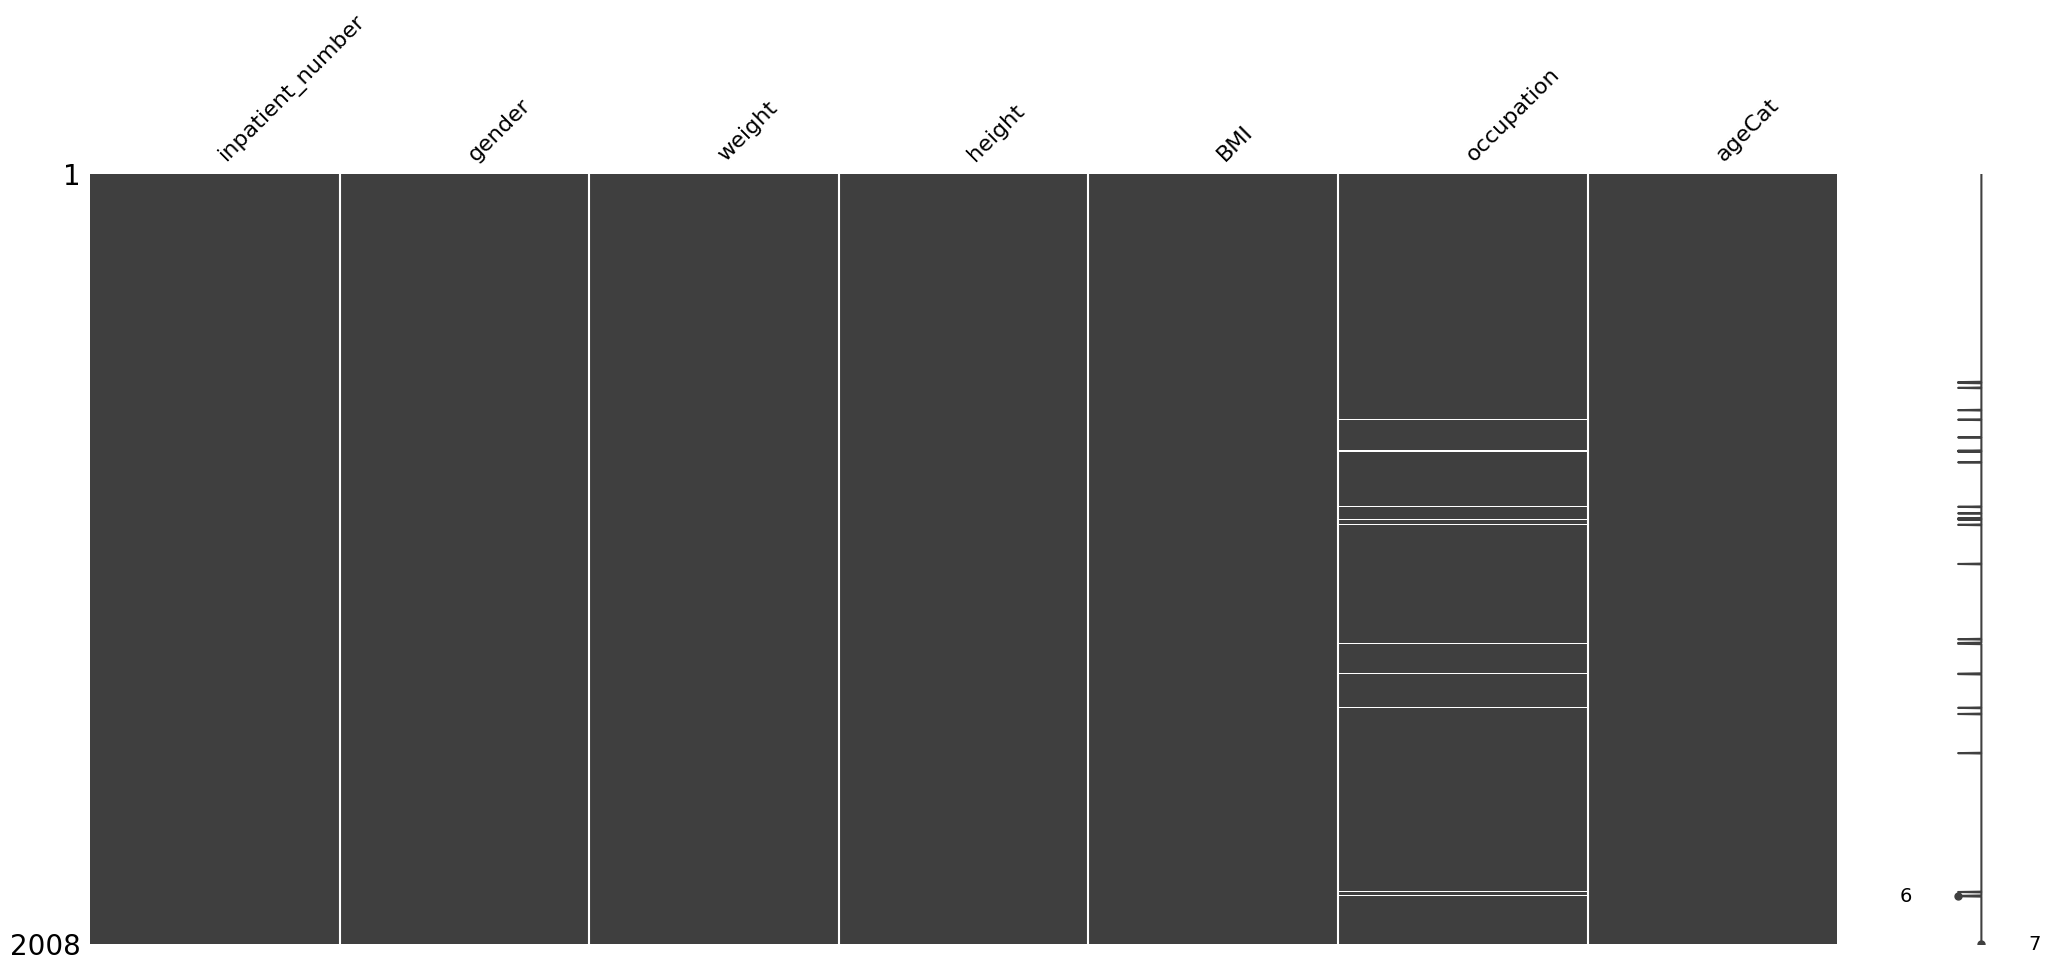

In [10]:
msno.matrix(df_D)

# Q8 Create a Waffle chart to show what percentage of total deaths belong to each admission_ward?

admission_ward
Cardiology     73
GeneralWard     9
ICU             9
Others          9
dtype: int32


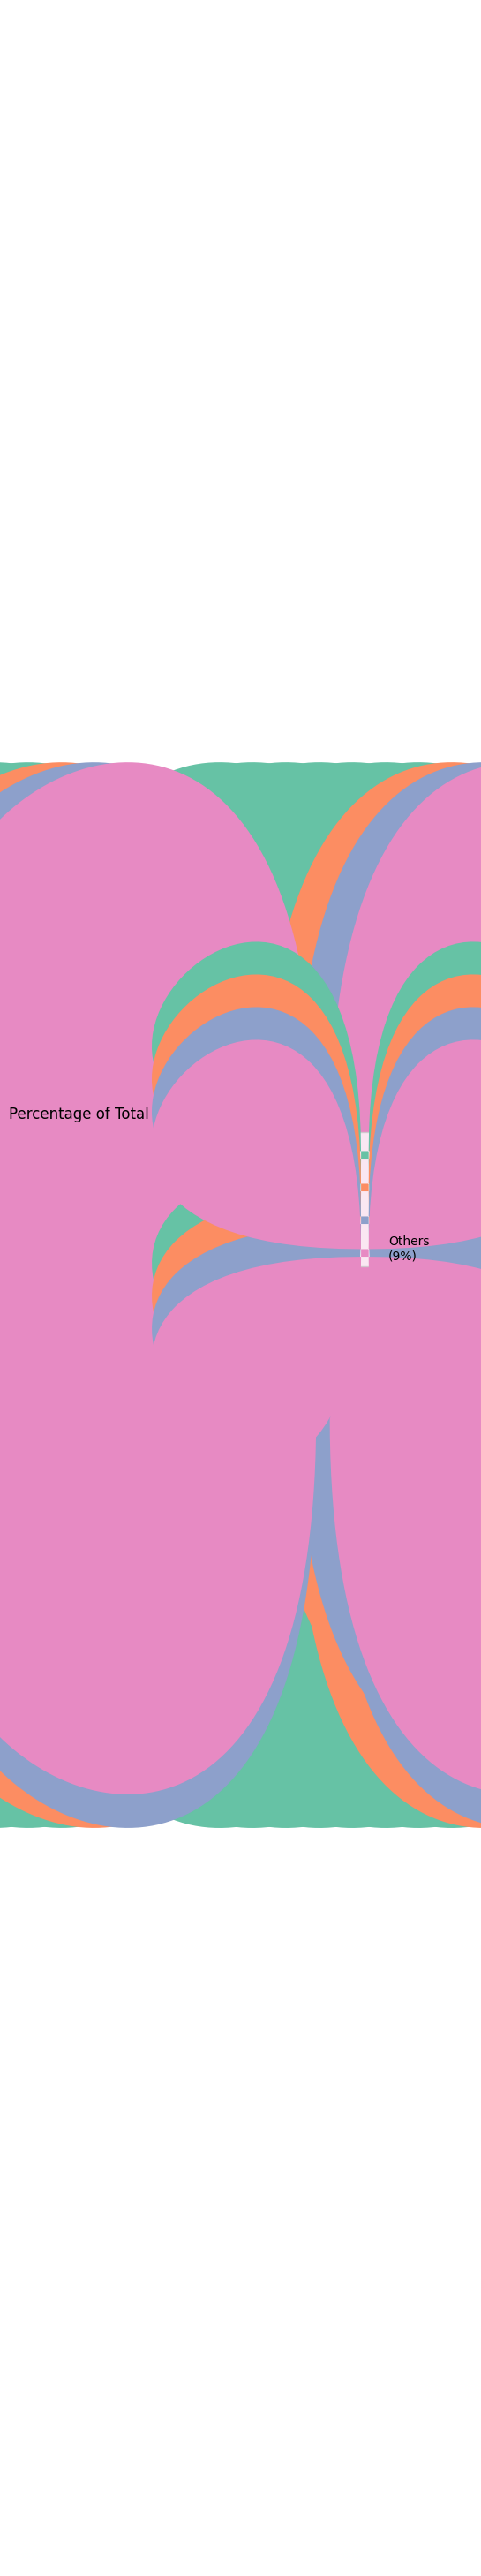

In [11]:
ward_deaths = df_HD[df_HD['outcome_during_hospitalization'] == 'Dead'].groupby('admission_ward').size()
total_deaths = ward_deaths.sum()

death_percentages = (ward_deaths / total_deaths) * 100

ward_death_percentage = death_percentages.round().astype(int)

print(ward_death_percentage)

fig = plt.figure(
    FigureClass=Waffle,
    columns=10,
    values=ward_death_percentage,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    labels=[f"{ward}\n({int(percentage)}%)" for ward, percentage in ward_death_percentage.items()],
    icons='square',
    icon_size=18,
    icon_legend=True
)

plt.title('Percentage of Total Deaths by Admission Ward')
plt.show()

# Q9 Create any 2 2-D arrays and perform matrix multiplication. Display the resulting array.

In [12]:
array1 = pd.DataFrame([[1, 2], [3, 4]])
array2 = pd.DataFrame([[5, 6], [7, 8]])

array1.dot(array2)

,0,1
0,19,22
1,43,50


# Q 10Display the percentage of missing values in each column in the table labs. Show the distribution as a bar graph

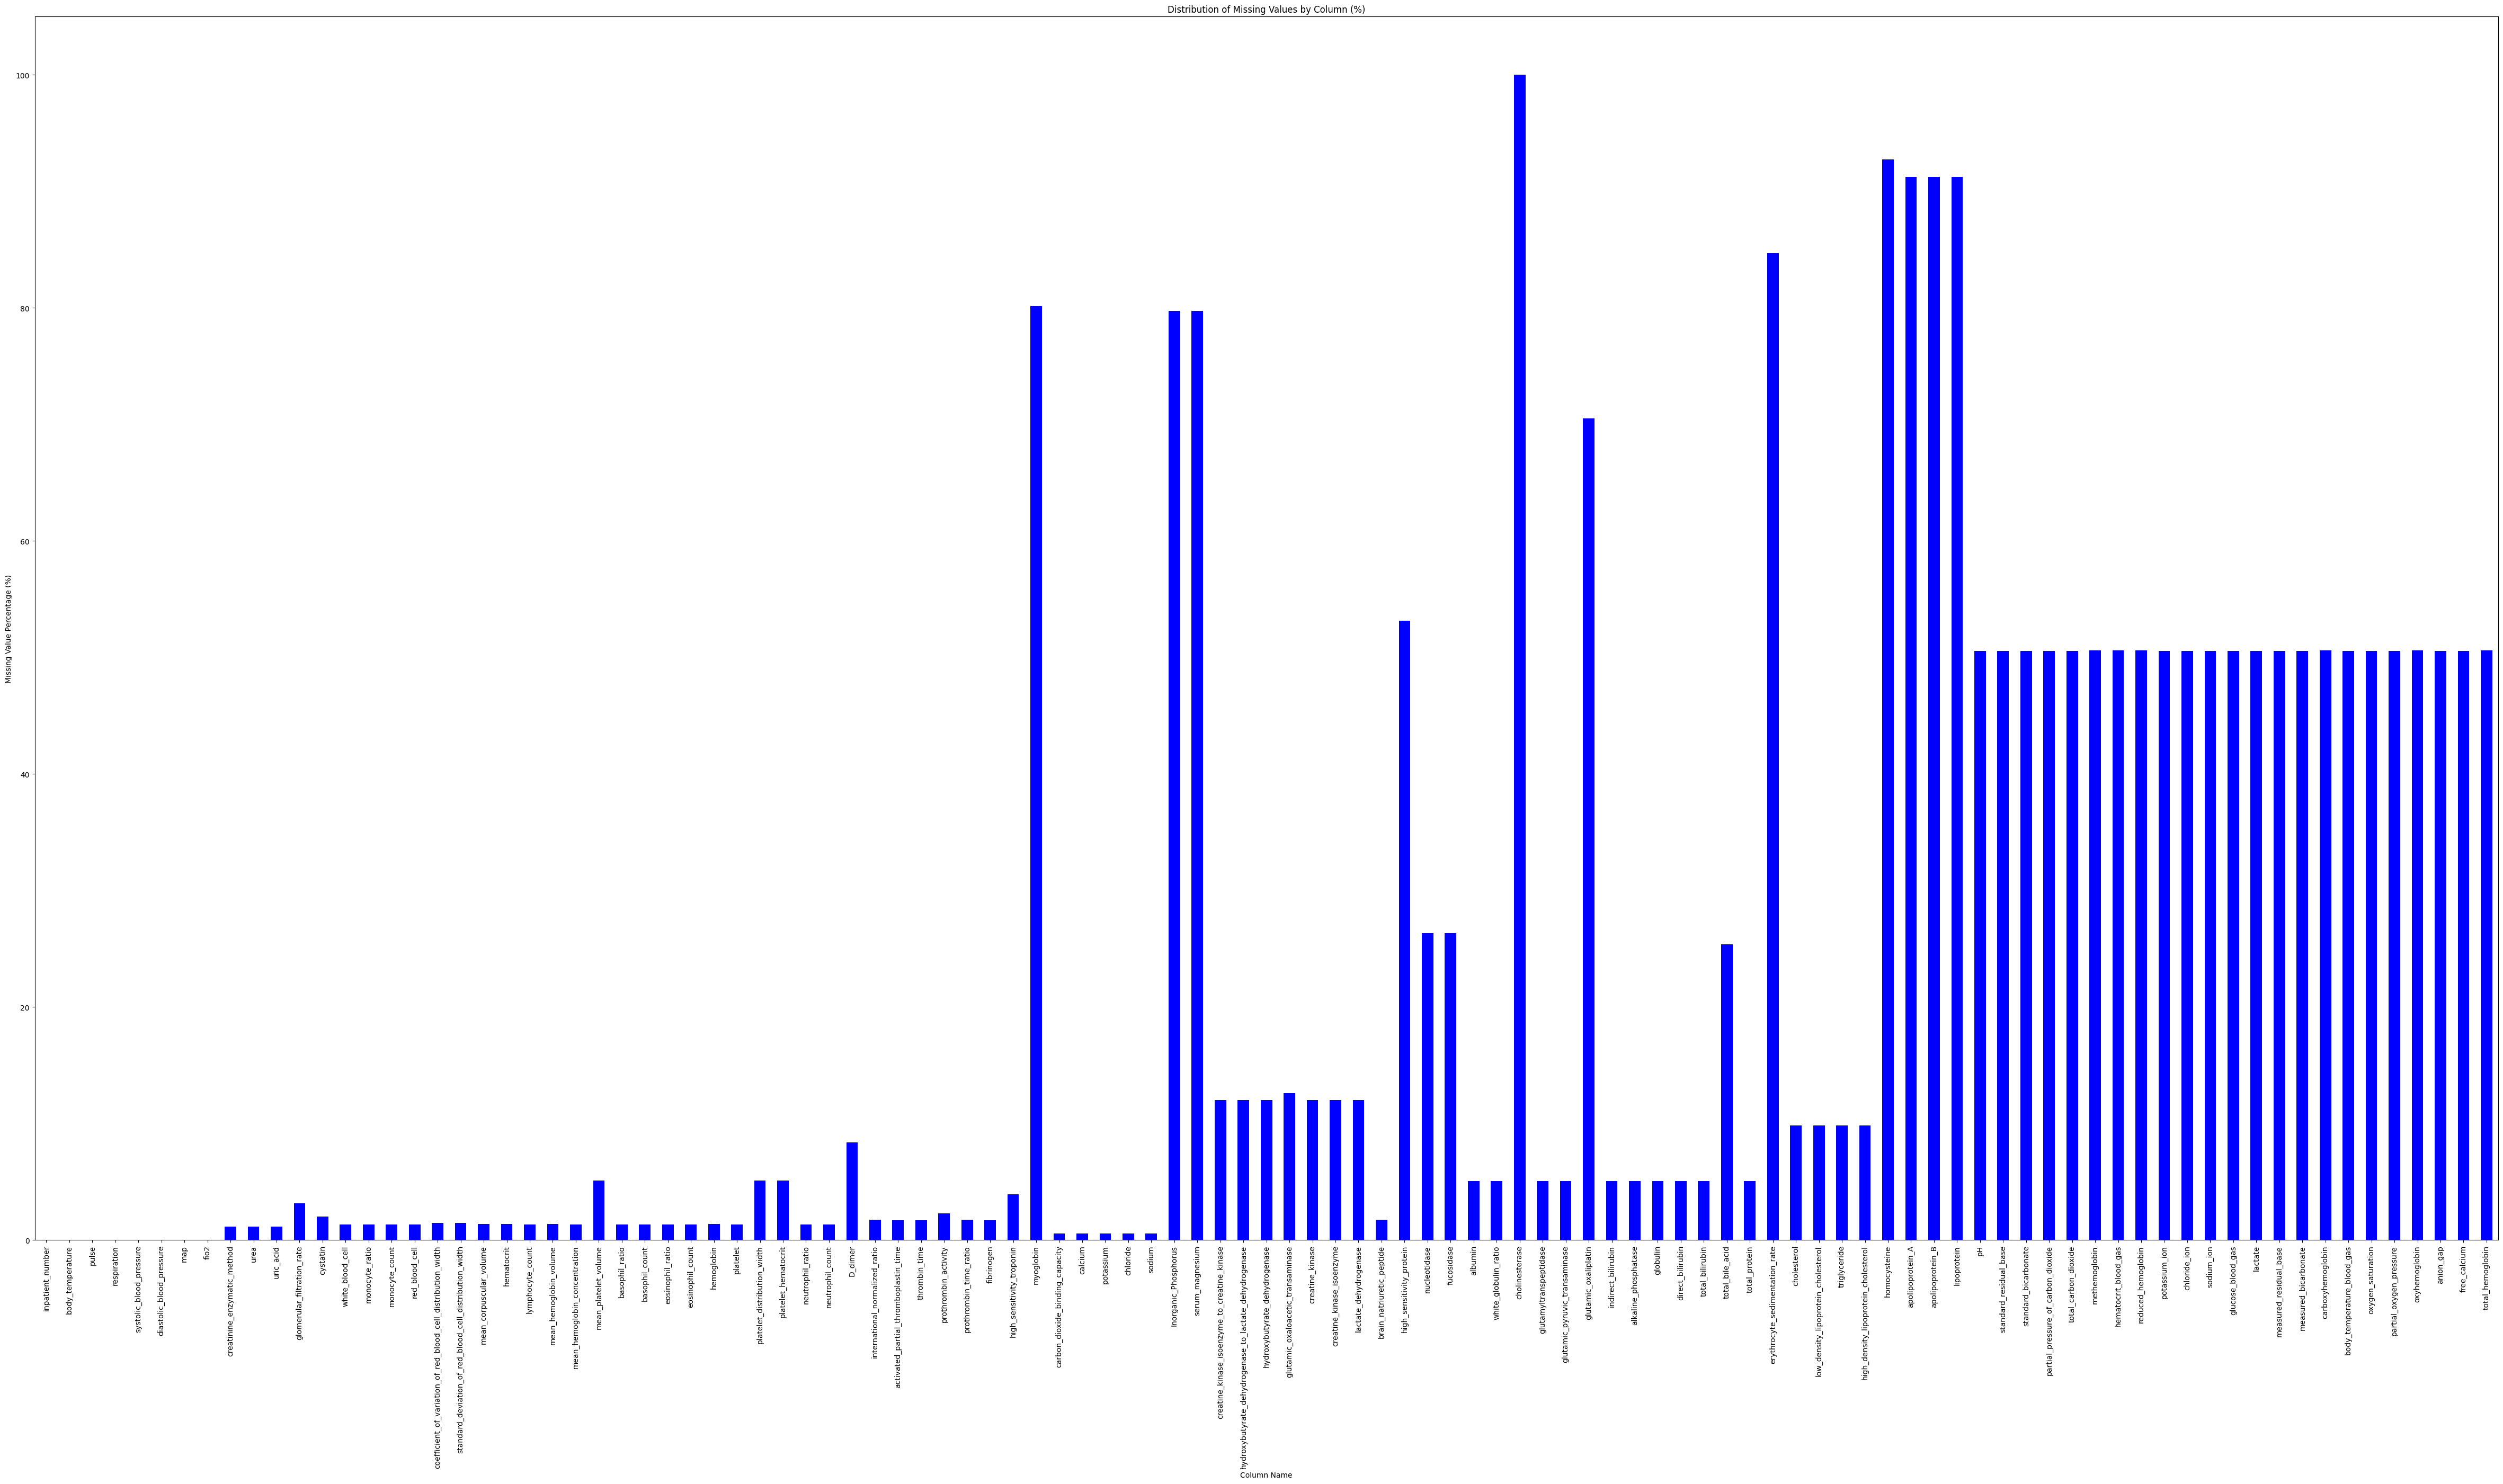

In [13]:
missing_values_percentage = (df_L.isna().sum() / len(df_L)) * 100
#print(missing_values_percentage.to_string())
plt.figure(figsize=(60, 30))
missing_values_percentage.plot(kind='bar', color='blue')
plt.title("Distribution of Missing Values by Column (%)")
plt.xlabel("Column Name")
plt.ylabel("Missing Value Percentage (%)")
plt.xticks(rotation=90)
plt.show()

# Q11 A valid mobile number is a ten digit number starting with a 7,8 or 9. For every string listed, print "YES" if it is a valid mobile number and "NO" if it is not on separate lines. Do not print the quotes.


In [15]:
if len(mobile_number) == 10 and mobile_number.startswith("7") or mobile_number.startswith("8") or mobile_number.startswith("9"):
    return "YES"
  else:
    return "NO"

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

# # Q12 If left ventricular end diastolic diameter has a normal range: 3.5 - 5.6 cm, how many patients fall outside that limit and what is the MAP of most patients with this condition?

In [16]:
df_abnormal_LVEDD = df_CC[(df_CC['left_ventricular_end_diastolic_diameter_LV'] < 3.5) | (df_CC['left_ventricular_end_diastolic_diameter_LV'] > 5.6)]
df_merged = df_abnormal_LVEDD.merge(df_L, on=['inpatient_number'])

abnormal_LVEDD_count = df_abnormal_LVEDD.shape[0]
most_common_map = df_merged['map'].mode()[0]

print("Number of patients with LVEDD outside the normal range:", abnormal_LVEDD_count)
print("Most common MAP of patients with this condition:", most_common_map)

Number of patients with LVEDD outside the normal range: 1311
Most common MAP of patients with this condition: 96.6666666666667


# Q13Create a bar chart between lengthofstay and body temperature, classified as: Hypothermia, within range or hyperthermia

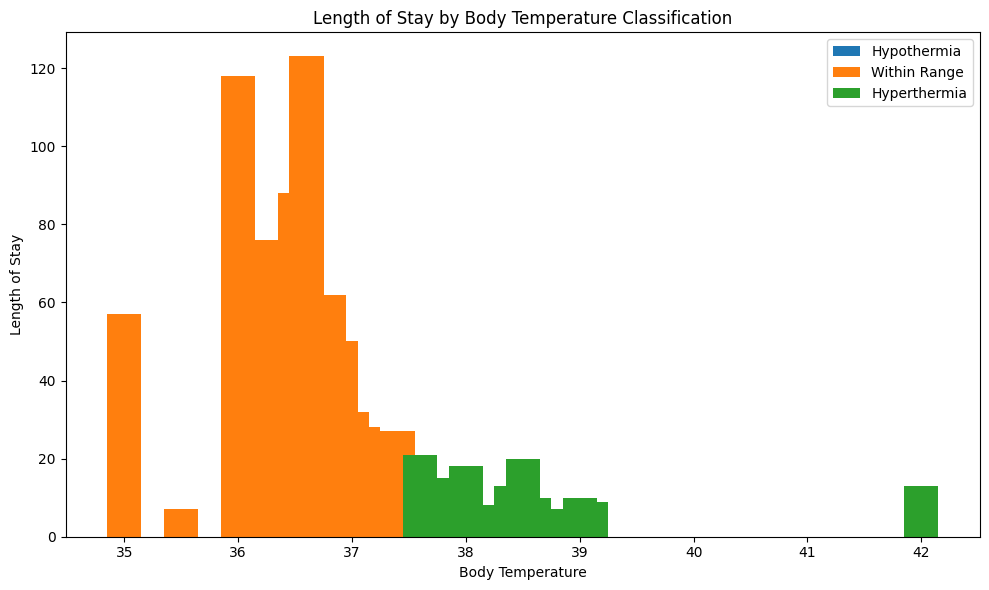

In [17]:
df_merged = df_HD.merge(df_L, on=['inpatient_number'])
hypothermia = df_merged[df_merged['body_temperature'] < 35]
within_range = df_merged[(df_merged['body_temperature'] >= 35) & (df_merged['body_temperature'] <= 37.5)]
hyperthermia = df_merged[df_merged['body_temperature'] > 37.5]

plt.figure(figsize=(10, 6))
plt.bar(hypothermia['body_temperature'], hypothermia['dischargeDay'], label='Hypothermia', width=0.3)
plt.bar(within_range['body_temperature'], within_range['dischargeDay'], label='Within Range', width=0.3)
plt.bar(hyperthermia['body_temperature'], hyperthermia['dischargeDay'], label='Hyperthermia', width=0.3)
plt.xlabel('Body Temperature')
plt.ylabel('Length of Stay')
plt.title('Length of Stay by Body Temperature Classification')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

# Q14 Find the list of patients whose DischargeDay is greater than the value given by the user

In [18]:
user_number = input("Enter A number: ")
user_number = int(user_number)
df_custom = df_HD.loc[df_HD['dischargeDay'] > user_number]

print (df_custom)

Enter A number:  22


      inpatient_number DestinationDischarge admission_ward admission_way  \
7               787530   HealthcareFacility     Cardiology     Emergency   
63              859541                 Home     Cardiology  NonEmergency   
89              773090                 Died     Cardiology  NonEmergency   
108             796520              Unknown            ICU     Emergency   
152             791071   HealthcareFacility    GeneralWard     Emergency   
...                ...                  ...            ...           ...   
1944            784421   HealthcareFacility     Cardiology     Emergency   
1945            842942                 Home     Cardiology     Emergency   
1987            759370   HealthcareFacility         Others     Emergency   
1997            750447                 Died     Cardiology  NonEmergency   
1999            804209              Unknown         Others  NonEmergency   

     discharge_department  visit_times respiratory_support oxygen_inhalation  \
7      

# Q15 Display a pie chart of number of patients in each category listed

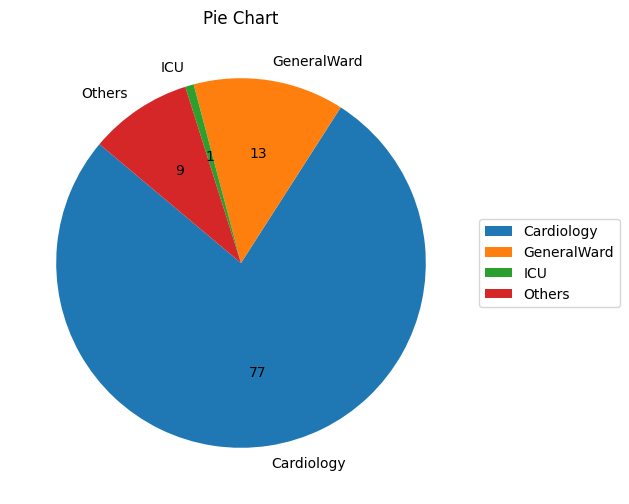

In [19]:
plt.figure(figsize=(8, 6))

patient_count = df_HD.groupby(['admission_ward'])["inpatient_number"].count()

plt.pie(patient_count, labels=patient_count.index, autopct='%1.0f', startangle=140)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Pie Chart')
plt.show()

# Q16 Create a pivot table with myocardial_infarction, congestive_heart_failure,peripheral_vascular_disease as rows and average Uric Acid and BMI as columns, using melt functions

# Q17 Using arrays and loops find the number of patients who were Admitted in the month of November

In [20]:
count = 0
for addmissionDate in pd.to_datetime(df_HD["Admission_date"]):
    if (addmissionDate.month == 11): # 11 is November month
        count = count + 1

print('Number patients addmitted in month of November: {}'.format(count))


Number patients addmitted in month of November: 195


# Q18	Create a heatmap on any columns of your choice including at least 1 lab value

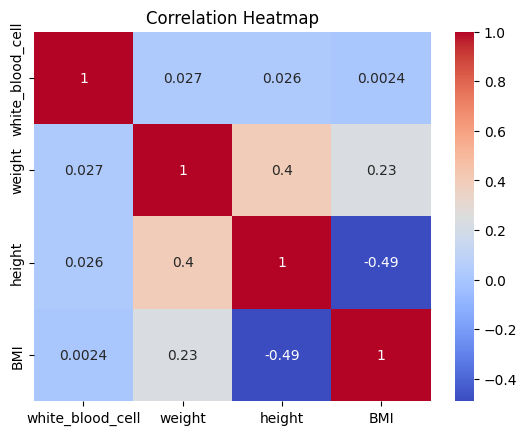

In [21]:
df_merge_heatmap = pd.merge(df_L[['inpatient_number','white_blood_cell']], df_D[['inpatient_number','weight','height','BMI']], on=['inpatient_number'])

# Calculate correlation matrix
correlation_matrix = df_merge_heatmap[['white_blood_cell','weight','height','BMI']].corr()

# Plotting heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Adding title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


# Q19	Create a bar chart by making list on Avg BMI and occupation column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method

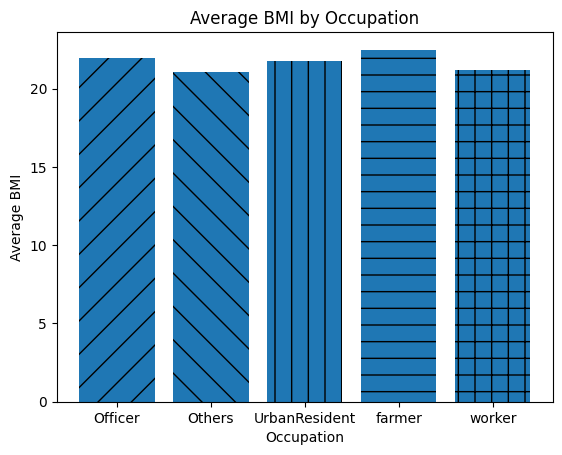

In [22]:
# Sample data (replace with your actual data)
avg_bmi_by_occupation = df_D.groupby('occupation')['BMI'].mean().to_dict()

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(avg_bmi_by_occupation.keys(), avg_bmi_by_occupation.values())

# Add hatch patterns to the bars
hatches = ['/', '\\', '|','-', '+']
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

# Adding labels and title
ax.set_xlabel('Occupation')
ax.set_ylabel('Average BMI')
ax.set_title('Average BMI by Occupation')

# Display the plot
plt.show()

# Q20	You are given three integers x,y,z representing the dimensions of a cuboid along with an integer n.  
Print a list of all possible coordinates given by(i,j,k) on a 3D grid where the sum of i,j,k is not equal to n.  
x=1, y=1, z=2, n=3



In [23]:
x = 1
y = 1
z = 2
n = 3

coordinates = []

for i in range(x + 1):
    for j in range(y + 1):
        for k in range(z + 1):
            if i + j + k != n:
                coordinates.append([i, j, k])

print(coordinates)

[[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 2]]


# Q21	Given the names and grades for each student in a class of students, store them in a nested list and print the name(s) of any student(s) having the second lowest grade.
python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]

In [24]:
python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]
python_students.sort(key = lambda x: x[1])
print('Sorted Array: {}'.format(python_students))
print('Second lowest grade: {}'.format(python_students[2][1]))

gradeValue = python_students[2][1]
for student_grade in python_students:
    if (student_grade[1] == gradeValue):
        print('Students with second lowest grade: {}'.format(student_grade[0]))


Sorted Array: [['Tina', 37.2], ['Harry', 37.21], ['Berry', 37.21], ['Harsh', 39], ['Akriti', 41]]
Second lowest grade: 37.21
Students with second lowest grade: Harry
Students with second lowest grade: Berry


# Q22	Which patient was on the most number of prescribed drugs? What was his age and outcome?

In [25]:
patient_with_max_drugs = df_PP['inpatient_number'].value_counts().idxmax()
patient_age = df_D[df_D['inpatient_number']==patient_with_max_drugs]['ageCat'].values[0]
patient_outcome = df_HD[df_HD['inpatient_number']==patient_with_max_drugs]['outcome_during_hospitalization'].values[0]

print('Patient with max durgs: {}'.format(patient_with_max_drugs))
print('Patient age: {}'.format(patient_age))
print('Patient outcome during hospitalization: {}'.format(patient_outcome))


Patient with max durgs: 777204
Patient age: 79-89
Patient outcome during hospitalization: Alive


# Q23 How many patients were prescribed Digoxin?

In [26]:
print('patients were prescribed Digoxin: {}'.format(df_PP[df_PP['Drug_name'].str.contains('Digoxin')].shape[0]))

patients were prescribed Digoxin: 999


# Q24	What columns indicate a prescence of anemia? Create a severity score for anemia and prove or disprove a correlation to Length of stay

Low value of hemoglobin indicate a presence of anemia


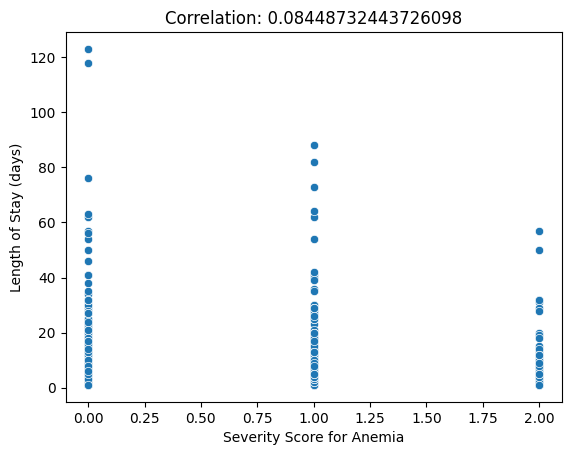

In [27]:
print('Low value of hemoglobin indicate a presence of anemia')

# Merging 'hematocrit' and 'dischargeDay' on'inpatient_number' to maintain data accuracy
df_hg_discharge_day = pd.merge(df_L[['inpatient_number','hemoglobin']], df_HD[['inpatient_number','dischargeDay']], on=['inpatient_number'])

# Create a severity score for anemia based on hematocrit levels
def severity_score(hemoglobin):
    if hemoglobin < 70:
        return 2  # Severe anemia
    elif hemoglobin < 100:
        return 1  # anemia
    else:
        return 0  # Normal

df_hg_discharge_day['Severity Score'] = df_hg_discharge_day['hemoglobin'].apply(severity_score)

# Calculate correlation
correlation = df_hg_discharge_day['Severity Score'].corr(df_hg_discharge_day['dischargeDay'])

# Plotting
sns.scatterplot(data=df_hg_discharge_day, x='Severity Score', y='dischargeDay')
plt.title(f'Correlation: {correlation}')
plt.xlabel('Severity Score for Anemia')
plt.ylabel('Length of Stay (days)')
plt.show()

# Q25	Using GCS score, how many patients are considered to be in a coma?

In [28]:
coma_gcs_score = 15
patients_in_coma = df_R[df_R['GCS'] == coma_gcs_score].shape[0];
print('Coma GCS score: {}'.format(coma_gcs_score))
print('Number of patients in coma: {}'.format(patients_in_coma))

Coma GCS score: 15
Number of patients in coma: 1951


# Q26	Create a column that randomly generates an age between the age group given for each patient. What was the average age of the patients?

In [29]:
df_D_Copy = df_D.copy()
df_D_Copy

# Create a severity score for anemia based on hematocrit levels
def generate_age(ageCategory):
    # Parse the range string
    lower_bound, upper_bound = map(int, ageCategory.split('-'))
    # Generate a random number within the specified range
    return random.randint(lower_bound, upper_bound)

df_D_Copy['age'] = df_D_Copy['ageCat'].apply(generate_age)

print('The average age of the patients: {}'.format(int(df_D_Copy['age'].mean())))


The average age of the patients: 74



# Q27	Using the age column generated in Q.26, calculate year of birth for each patient

In [30]:
def cal_birth_year(age):    
    # Current year
    current_year = datetime.now().year
    # Generate a random number within the specified range
    return current_year - age

df_D_Copy['birth_year'] = df_D_Copy['age'].apply(cal_birth_year)
df_D_Copy.head()

,inpatient_number,gender,weight,height,BMI,occupation,ageCat,age,birth_year
0,857781,Male,50.0,1.64,18.590125,UrbanResident,69-79,76,1948
1,743087,Female,51.0,1.63,19.195303,UrbanResident,69-79,71,1953
2,866418,Male,70.0,1.70,24.221453,farmer,59-69,65,1959
3,775928,Male,65.0,1.70,22.491349,UrbanResident,69-79,73,1951
4,810128,Female,76.0,1.55,31.633715,UrbanResident,69-79,71,1953


# Q28	Store patient number and gender in a dictionary as a pair of values. Show the first 10 values


In [31]:
patient_gender_dict = dict(zip(df_D['inpatient_number'], df_D['gender']))

count = 0
for item in patient_gender_dict.items():
    if count == 10:
        break;
    count = count + 1
    print(item)

(857781, 'Male')
(743087, 'Female')
(866418, 'Male')
(775928, 'Male')
(810128, 'Female')
(823318, 'Female')
(844094, 'Male')
(787530, 'Female')
(795420, 'Female')
(829801, 'Female')


# Q29	What percentage of those in a coma also have diabetes?

In [32]:
df_coma_diabetes =  pd.merge(df_R[df_R['GCS'] == coma_gcs_score], df_PH[df_PH['diabetes']==1], on=['inpatient_number'])
diabetes_count_in_coma = df_coma_diabetes.shape[0]
print('Number of patients in coma with diabetes: {}'.format(diabetes_count_in_coma))
print('Percentage of patients in coma with diabetes: {}'.format((diabetes_count_in_coma/patients_in_coma)*100))

Number of patients in coma with diabetes: 456
Percentage of patients in coma with diabetes: 23.37262942080984


# Q30	Identify any columns relating to echocardiography and create a severity score for cardiac function. Compare this outcome and show average severity score for each outcome

# Q31	Group the days to re-admission into bins and count how many patients were in each bin

In [33]:
df_re_admission = df_HD.copy()

# Function to map values to days
def map_re_admission(row):
    if row['re_admission_within_28_days'] == 1:
        return 28
    elif row['re_admission_within_3_months'] == 1:
        return 90
    elif row['re_admission_within_6_months'] == 1:
        return 180
    else:
        return 0

# Create the new column 'readmission_in_days' using apply
df_re_admission['readmission_in_days'] = df_re_admission.apply(lambda row: map_re_admission(row), axis=1)

# Define bins for days to re-admission
bins = [0, 28, 90, 180]

# Group days to re-admission into bins and count patients in each bin
bin_counts = pd.cut(df_re_admission['readmission_in_days'], bins=bins).value_counts().sort_index()

# Display the counts in each bin
print("Counts for re-admission:")
print(bin_counts)


Counts for re-admission:
readmission_in_days
(0, 28]      140
(28, 90]     358
(90, 180]    278
Name: count, dtype: int64


# Q32	Combine admission_ward & admission_way and count the patients under the new group. Create a pie chart and explode the biggest wedge

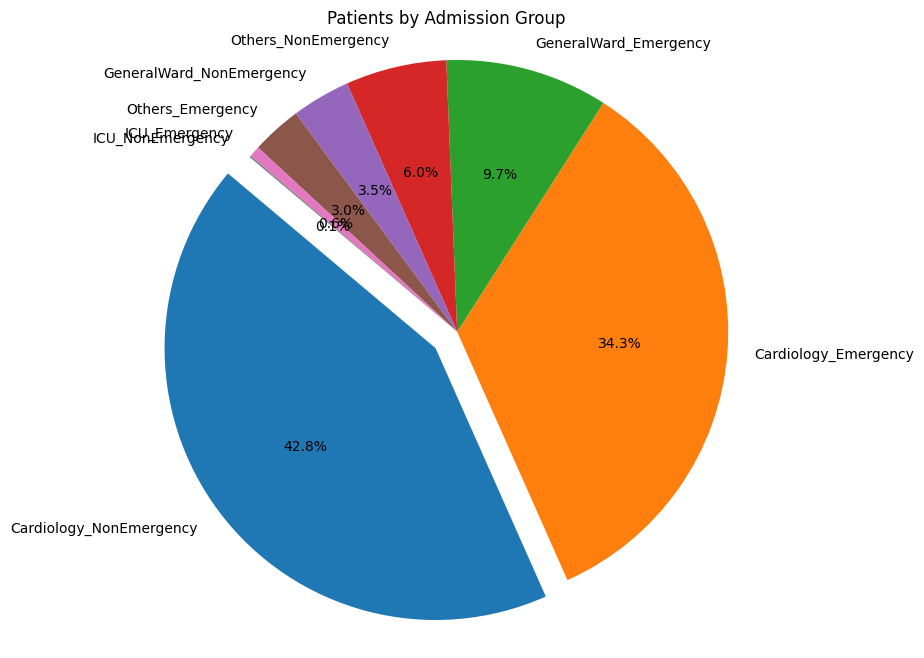

In [34]:
df_addmission_grp = df_HD.copy()

df_addmission_grp['admission_group'] = df_addmission_grp['admission_ward'] + '_' + df_addmission_grp['admission_way']

# Count the number of patients in each group
group_counts = df_addmission_grp['admission_group'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
explode = [0.1 if idx == group_counts.idxmax() else 0 for idx in group_counts.index]
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', explode=explode, startangle=140)
plt.title('Patients by Admission Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

# Q33	Retrieve the row with minimum white_blood_cell count using sorting technique.

In [35]:
df_L_Sorted = df_L.sort_values(by='white_blood_cell')
row_with_min_wbc = df_L_Sorted.iloc[0]

print("Row with minimum white_blood_cell count:")
row_with_min_wbc

Row with minimum white_blood_cell count:


inpatient_number           746068.00
body_temperature               37.10
pulse                          71.00
respiration                    20.00
systolic_blood_pressure       130.00
                             ...    
partial_oxygen_pressure        95.00
oxyhemoglobin                  96.30
anion_gap                      16.80
free_calcium                    1.11
total_hemoglobin               94.00
Name: 865, Length: 107, dtype: float64

# Q34	get the last letter of discharge_department of patients using RegEX

In [36]:

# Extract the last letter of 'discharge_department' using regex
df_HD['last_letter'] = df_HD['discharge_department'].str.extract(r'(.)$')

df_HD[['discharge_department','last_letter']].head()

,discharge_department,last_letter
0,Cardiology,y
1,Cardiology,y
2,Cardiology,y
3,Cardiology,y
4,Cardiology,y
